<a href="https://colab.research.google.com/github/HromovAndrey/II_Praktica_mood_3/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%BD%D0%B0_%D0%B0%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D0%B4%D0%B0%D0%BD%D0%B8%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів та даних

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
sales = pd.read_csv(
    'https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/bike_sales.csv',
    index_col = "Unnamed: 0",
    parse_dates=['Date'])

In [3]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


# Завдання 1
Виведіть середнє значення та медіану для `order_quantity`. Чи є викиди?

Середнє значення для Order_Quantity: 12.6
Медіана для Order_Quantity: 8.0


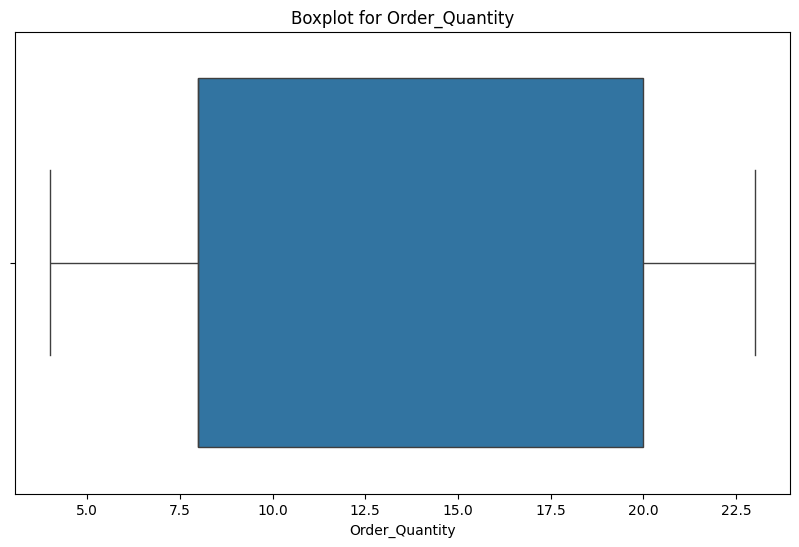

In [10]:

data = """
Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
"""

df = pd.read_csv(StringIO(data))

df

mean_order_quantity = df['Order_Quantity'].mean()
median_order_quantity = df['Order_Quantity'].median()

print(f"Середнє значення для Order_Quantity: {mean_order_quantity}")
print(f"Медіана для Order_Quantity: {median_order_quantity}")

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Order_Quantity'])
plt.title('Boxplot for Order_Quantity')
plt.xlabel('Order_Quantity')
plt.show()


# Завдання 2
Намалюйте гістограму та ящик з вусами для `order_quantity`

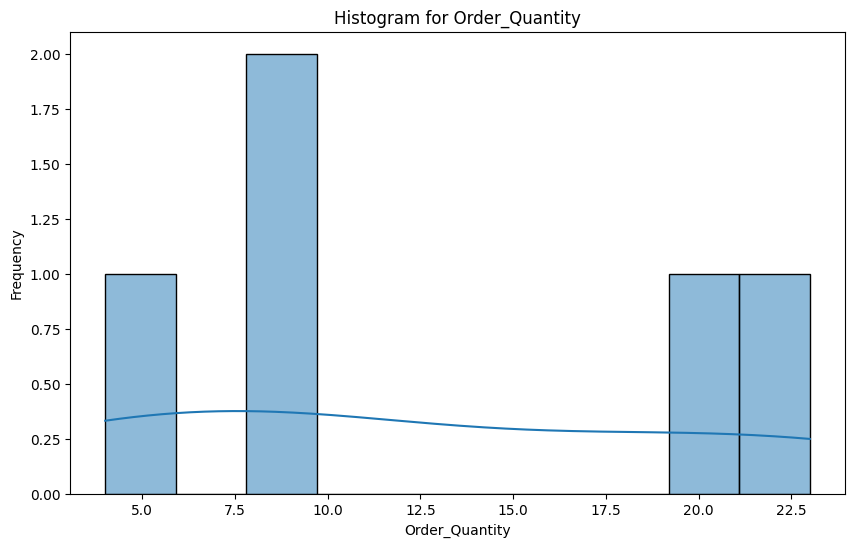

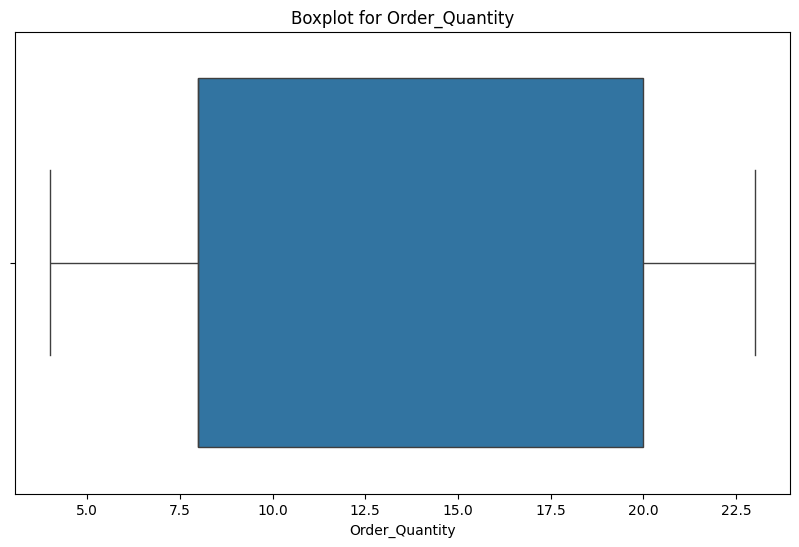

In [9]:



data = """
Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
"""
df = pd.read_csv(StringIO(data))

plt.figure(figsize=(10, 6))
sns.histplot(df['Order_Quantity'], bins=10, kde=True)
plt.title('Histogram for Order_Quantity')
plt.xlabel('Order_Quantity')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Order_Quantity'])
plt.title('Boxplot for Order_Quantity')
plt.xlabel('Order_Quantity')
plt.show()


# Завдання 3
Очистіть дані від викидів. Алгоритм:

1. Обчислюємо нижній `q1` та верхній `q3` квантилі
2. Очислюємо значення `IQR = q3 - q1`
3. Обчислюємо `lower = q1 - 1.5*IQR`
4. Обчислюємо `upper = q3 + 1.5*IQR`
5. Викидами вважаємо значення які `< lower` або `>upper`

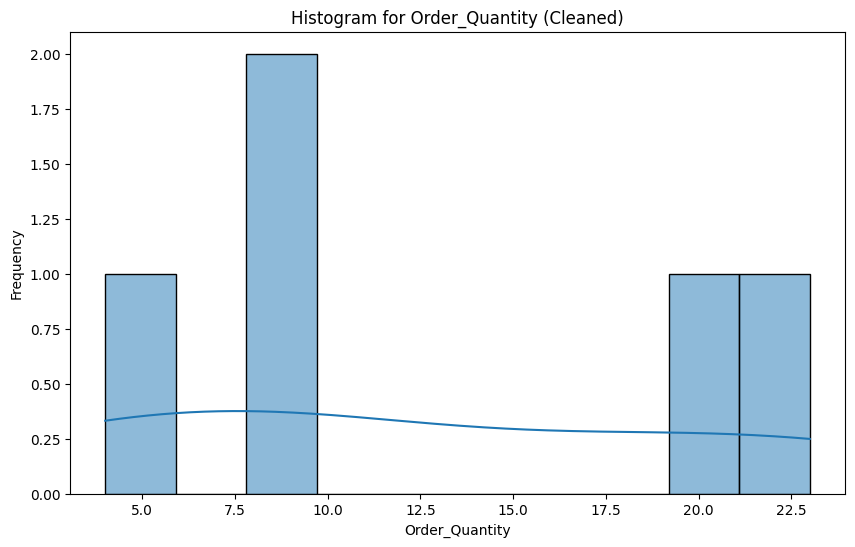

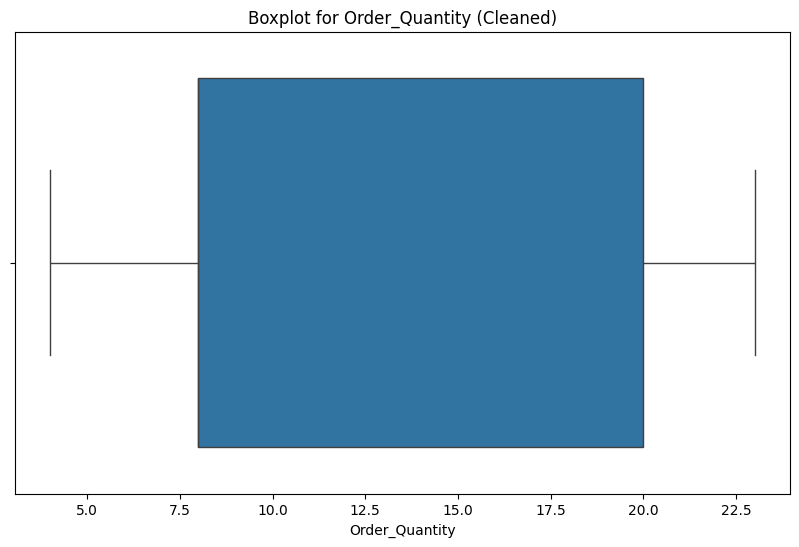

In [11]:

data = """
Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
"""

df = pd.read_csv(StringIO(data))
q1 = df['Order_Quantity'].quantile(0.25)
q3 = df['Order_Quantity'].quantile(0.75)
IQR = q3 - q1
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR
df_cleaned = df[(df['Order_Quantity'] >= lower_bound) & (df['Order_Quantity'] <= upper_bound)]
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Order_Quantity'], bins=10, kde=True)
plt.title('Histogram for Order_Quantity (Cleaned)')
plt.xlabel('Order_Quantity')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['Order_Quantity'])
plt.title('Boxplot for Order_Quantity (Cleaned)')
plt.xlabel('Order_Quantity')
plt.show()


# Завдання 4
Ввиведіть гістограму з кількістю чоловіків та жінок серед покупців.

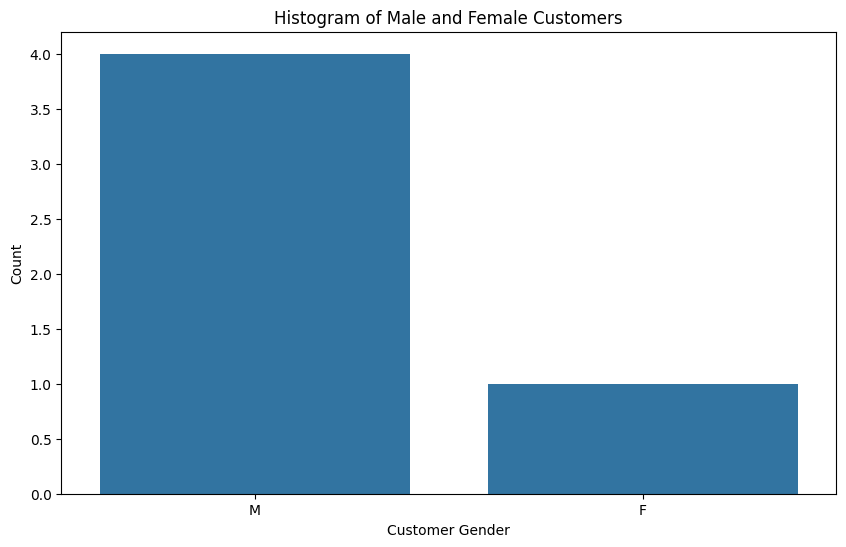

In [12]:

data = """
Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
"""
df = pd.read_csv(StringIO(data))
plt.figure(figsize=(10, 6))
sns.countplot(x='Customer_Gender', data=df)
plt.title('Histogram of Male and Female Customers')
plt.xlabel('Customer Gender')
plt.ylabel('Count')
plt.show()


# Завдання 5
Виведіть точкову діаграму для ознак `order_quantity` та `revenue`

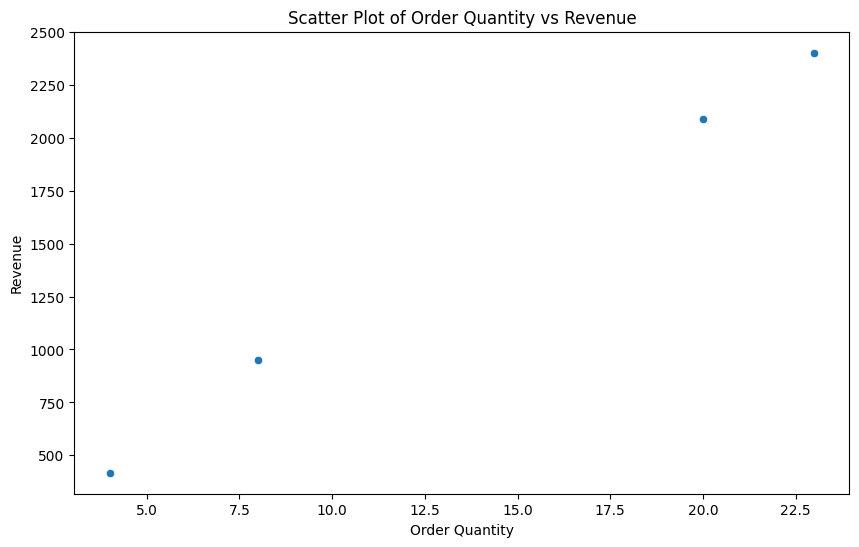

In [13]:

data = """
Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
"""
df = pd.read_csv(StringIO(data))
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Order_Quantity', y='Revenue', data=df)
plt.title('Scatter Plot of Order Quantity vs Revenue')
plt.xlabel('Order Quantity')
plt.ylabel('Revenue')
plt.show()


# Завдання 6
Знайдіть категоріальну характеристику, від якої залежить ознака `profit`

In [16]:

data = """
Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
"""
df = pd.read_csv(StringIO(data))
categorical_features = ['Age_Group', 'Customer_Gender', 'Country', 'State', 'Product_Category', 'Sub_Category']
anova_results = {}
for feature in categorical_features:
    model = ols(f'Profit ~ C({feature})', data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    anova_results[feature] = anova_table['PR(>F)'][0]
sorted_anova_results = sorted(anova_results.items(), key=lambda x: x[1])
print("Категоріальні характеристики за впливом на ознаку 'Profit':")
for feature, p_value in sorted_anova_results:
    print(f"{feature}: p-value = {p_value:.4f}")

most_influential_feature = sorted_anova_results[0][0]
plt.figure(figsize=(10, 6))
sns.boxplot(x=most_influential_feature, y='Profit', data=df)
plt.title(f'Boxplot of Profit by {most_influential_feature}')
plt.xlabel(most_influential_feature)
plt.ylabel('Profit')
plt.show()


ValueError: must have at least one row in constraint matrix